In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import collections
from sklearn import preprocessing
import csv
from operator import itemgetter

# 11.1 Network Statistics – Analyzing a Fish Trade Network

## Preprocessing Loading in Fish Data

In [0]:
edgelist_fish = pd.read_table("/content/drive/My Drive/DataScience/ML_11/week11_fish_trade_edges.txt",skiprows=[0], header=None)

In [4]:
edgelist_fish.columns = ["Country_A","Country_B","Weight"]
edgelist_fish.head()

Country_A  Country_B  Weight
0          1          2   0.983
1          1          3   0.664
2          1          4   2.004
3          1          5   0.557
4          1          6   0.355

In [5]:
print("The Graph Consist of " + str(len(edgelist_fish))+ " edges!")

The Graph Consist of 2744 edges!


In [0]:
G_fishes = nx.from_pandas_edgelist(edgelist_fish, "Country_A" , 'Country_B', ['Weight'],create_using=nx.MultiDiGraph())

In [0]:
labellist_fish = pd.read_table("/content/drive/My Drive/DataScience/ML_11/week11_fish_trade_countries_key.txt",skiprows=[0], header=None)

In [8]:
labellist_fish.columns = ["Node_ID","Country"]
labellist_fish.head()

Node_ID  Country
0        1   Turkey
1        2  Lebanon
2        3   Taiwan
3        4  Ireland
4        5   Sweden

In [9]:
print("The Graph Consist of " + str(len(labellist_fish))+ " nodes!")

The Graph Consist of 151 nodes!


In [0]:
mapping = dict(zip(labellist_fish["Node_ID"].tolist(),labellist_fish["Country"].tolist()))

In [0]:
G_fishes = nx.relabel_nodes(G_fishes, mapping)

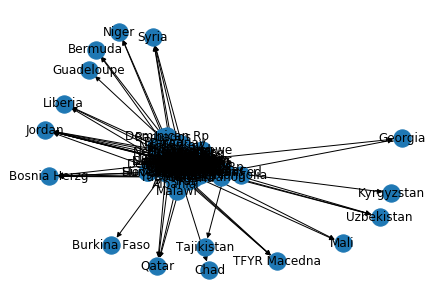

In [12]:
pos = nx.spring_layout(G_fishes)
nx.draw(G_fishes, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

## Find strongly connected components

In [0]:
SCC_Nodes = nx.strongly_connected_components(G_fishes)

In [0]:
 largest = max(SCC_Nodes, key=len)

In [15]:
print("The largest strongly connected component consists of: " + str(largest))

print("It makes up " + str((len(largest)/len(labellist_fish))*100) + " Percent of the total network!")

The largest strongly connected component consists of: {'Guyana', 'Germany', 'Tanzania', 'Iraq', 'Albania', 'Bahrain', 'Senegal', 'Sri Lanka', 'Croatia', 'Slovenia', 'USA', 'India', 'Colombia', 'Venezuela', 'Dominican Rp', 'Myanmar', 'El Salvador', 'Mozambique', 'Denmark', 'Greece', 'Mauritius', 'Nicaragua', 'Bulgaria', 'Malawi', 'Latvia', 'Cambodia', 'Togo', 'Seychelles', 'Netherlands', 'Saudi Arabia', 'Belize', 'China', 'Italy', 'Gabon', 'France,Monac', 'Belgium-Lux', 'Guatemala', 'Peru', 'Taiwan', 'Gibraltar', 'Angola', 'Mauritania', 'Barbados', 'Bahamas', 'Ecuador', 'Argentina', 'Mexico', 'Greenland', 'Bangladesh', 'Iceland', 'Sweden', 'UK', 'Guinea', 'Paraguay', 'Malaysia', 'Oman', 'Finland', 'Kazakhstan', 'Thailand', 'Tunisia', 'Kuwait', 'Cyprus', 'Israel', 'Haiti', 'Lebanon', 'Singapore', 'Portugal', 'Libya', 'Czech Rep', 'China HK SAR', 'Cote Divoire', 'Ukraine', 'Ireland', 'Untd Arab Em', 'Algeria', 'South Africa', 'Samoa', 'Bolivia', 'Armenia', 'Cameroon', 'Romania', 'Sierra L

## Countries Max Distance from Germany

In [0]:
germany_distance_paths = nx.shortest_path_length(G_fishes,source="Germany",weight=None)

In [17]:
print(germany_distance_paths)

{'Germany': 0, 'Sweden': 1, 'Latvia': 1, 'Ukraine': 1, 'Haiti': 1, 'Slovakia': 1, 'Malta': 1, 'Singapore': 1, 'Romania': 1, 'Philippines': 1, 'Argentina': 1, 'Yugoslavia': 1, 'Thailand': 1, 'Hungary': 1, 'Taiwan': 1, 'Belarus': 1, 'Dominican Rp': 1, 'Malaysia': 1, 'Austria': 1, 'Switz.Liecht': 1, 'Russian Fed': 1, 'Egypt': 1, 'Norway': 1, 'Poland': 1, 'Denmark': 1, 'China': 1, 'Saudi Arabia': 1, 'Brazil': 1, 'Greece': 1, 'France,Monac': 1, 'Bosnia Herzg': 1, 'Mali': 1, 'Lithuania': 1, 'Cyprus': 1, 'Ireland': 1, 'Turkey': 1, 'UK': 1, 'Spain': 1, 'Israel': 1, 'Lebanon': 1, 'China HK SAR': 1, 'Estonia': 1, 'Portugal': 1, 'Bulgaria': 1, 'Netherlands': 1, 'Venezuela': 1, 'USA': 1, 'Japan': 1, 'Croatia': 1, 'South Africa': 1, 'Czech Rep': 1, 'Finland': 1, 'Canada': 1, 'Ghana': 1, 'Slovenia': 1, 'Italy': 1, 'Belgium-Lux': 1, 'Australia': 1, 'Kazakhstan': 2, 'Indonesia': 2, 'Mauritius': 2, 'Untd Arab Em': 2, 'Viet Nam': 2, 'Korea Rep.': 2, 'Bahrain': 2, 'Seychelles': 2, 'New Zealand': 2, 'Sri 

In [0]:
countries_list        = list(germany_distance_paths.keys())
distance_from_germany = list(germany_distance_paths.values())

max_value = max(distance_from_germany)
max_countries = {}
for i,country in enumerate(countries_list):
  distance = distance_from_germany[i]
  if distance == max_value:
    max_countries[country] = distance



In [19]:
print(max_countries)

{'India': 3, 'Guinea': 3, 'Burkina Faso': 3, 'Chad': 3}


## Reciprocal Edges

In [0]:
percantage_reciprocity = nx.reciprocity(G_fishes, nodes=None)

In [21]:
print("The percentage of reciprocal edges is: " + str(percantage_reciprocity*100))


The percentage of reciprocal edges is: 46.7201166180758


## Rank of top 10 countries by in-degree

In [0]:
all_in_degrees = G_fishes.in_degree()

In [0]:
dct_in_degrees = dict(all_in_degrees)

In [0]:
s = sorted(dct_in_degrees.items(), key=lambda x: x[1], reverse=True)

In [0]:
top_10_countries = []
for i in range(0,10,1):
  top_10_countries.append(s[i])

In [26]:
print(top_10_countries)

[('Japan', 95), ('USA', 92), ('France,Monac', 91), ('Germany', 85), ('Spain', 83), ('Italy', 81), ('UK', 76), ('Netherlands', 75), ('China HK SAR', 70), ('Belgium-Lux', 68)]


## Sum of outbund Edges Weight

In [0]:
outbound_edges = G_fishes.out_edges()

In [28]:
print(outbound_edges)

[('Turkey', 'Lebanon'), ('Turkey', 'Taiwan'), ('Turkey', 'Ireland'), ('Turkey', 'Sweden'), ('Turkey', 'Cyprus'), ('Turkey', 'Spain'), ('Turkey', 'Slovakia'), ('Turkey', 'UK'), ('Turkey', 'Nigeria'), ('Turkey', 'Denmark'), ('Turkey', 'Germany'), ('Turkey', 'Canada'), ('Turkey', 'Belgium-Lux'), ('Turkey', 'France,Monac'), ('Turkey', 'Greece'), ('Turkey', 'Italy'), ('Turkey', 'Syria'), ('Turkey', 'Netherlands'), ('Turkey', 'Japan'), ('Turkey', 'Croatia'), ('Turkey', 'USA'), ('Turkey', 'Switz.Liecht'), ('Turkey', 'Austria'), ('Lebanon', 'France,Monac'), ('Taiwan', 'Thailand'), ('Taiwan', 'China HK SAR'), ('Taiwan', 'Korea Rep.'), ('Taiwan', 'Kuwait'), ('Taiwan', 'Tunisia'), ('Taiwan', 'Philippines'), ('Taiwan', 'Israel'), ('Taiwan', 'UK'), ('Taiwan', 'Turkey'), ('Taiwan', 'Singapore'), ('Taiwan', 'Mexico'), ('Taiwan', 'Spain'), ('Taiwan', 'China'), ('Taiwan', 'Italy'), ('Taiwan', 'Australia'), ('Taiwan', 'France,Monac'), ('Taiwan', 'Greece'), ('Taiwan', 'Belgium-Lux'), ('Taiwan', 'Saudi Ar

In [0]:
#for country in countries_list:


country="Turkey"
out_bound_weightssum = {}

for key,country in mapping.items():
  sum_weights = []
  for edges in outbound_edges:
    if edges[0] == country:
      edge_data = G_fishes.get_edge_data(edges[0],edges[1],key=0)
      sum_weights.append(edge_data["Weight"])

  out_bound_weightssum[country] = sum(sum_weights)

In [30]:
print(out_bound_weightssum)

{'Turkey': 105.18800000000002, 'Lebanon': 1.025, 'Taiwan': 1228.114, 'Ireland': 381.377, 'Sweden': 306.4750000000001, 'Cyprus': 6.948000000000001, 'Spain': 1404.4999999999993, 'Slovakia': 2.4059999999999997, 'UK': 1394.327, 'Nigeria': 58.982, 'Denmark': 2138.935, 'Germany': 818.746, 'Canada': 2474.0610000000006, 'Belgium-Lux': 278.326, 'France,Monac': 1075.5470000000003, 'Greece': 201.73299999999998, 'Italy': 343.6490000000001, 'Syria': 0, 'Netherlands': 1608.13, 'Japan': 760.7120000000002, 'Croatia': 31.304000000000002, 'USA': 2553.9380000000006, 'Switz.Liecht': 8.915, 'Austria': 6.873, 'Iraq': 1.709, 'Iran': 69.016, 'Singapore': 258.7029999999999, 'Untd Arab Em': 64.43499999999999, 'Thailand': 4046.182999999998, 'China HK SAR': 127.775, 'Portugal': 281.884, 'Kuwait': 8.081, 'Russian Fed': 2445.563000000001, 'China': 3059.796, 'Australia': 703.5629999999999, 'Ethiopia': 1.163, 'El Salvador': 36.719, 'Mexico': 613.8599999999999, 'Viet Nam': 744.481, 'Norway': 3513.283, 'Poland': 212.12

In [0]:
s = sorted(out_bound_weightssum.items(), key=lambda x: x[1], reverse=True)

In [0]:
top_5_countries_exports = []
for i in range(0,5,1):
  top_5_countries_exports.append(s[i])

In [33]:
print(top_5_countries_exports)

[('Thailand', 4046.182999999998), ('Norway', 3513.283), ('China', 3059.796), ('USA', 2553.9380000000006), ('Canada', 2474.0610000000006)]


## Biggest Difference between in and outdegree

In [0]:
all_out_degrees = dict(G_fishes.out_degree())

In [35]:
np_out = vals = np.fromiter(all_out_degrees.values(), dtype=int)
np_in = np.fromiter(dct_in_degrees.values(), dtype=int)
print(np_out)

[23  1 29 43 31  6 78  6 63 10 54 57 50 29 58 27 46  0 70 54 13 67 12 10
  1 20 42 23 98 20 34  4 48 45 30  2  5 29 28 83 28 43 33 45 14  2 25  9
 35 59 42 19 28 16 10 16 14 33 19  9 36  3 10 23 45 44 57  4 12  8  6  9
  7  0  2  1  1  3  4  7  2  0  0 11 21  9  9 12  1 11 16  6 10  2  4 22
 47 18  3 11 12  4  1  1 24  5  3  1  7  1  1  8  5 14 18  5  2 15  6  5
  0  8 17  8  2  6 28  2  2  0 18 12  0  0  0  0 58 17 16  0  0  0  0 19
  3 13  9  0  0  9 14]


In [0]:
diff_intoout = np.abs(np_in - np_out)

In [0]:
max_diff = 0
for i,value in enumerate(diff_intoout):
  if value >= max_diff:
    max_diff = value
    max_index = i

In [38]:
countries = list(all_out_degrees.keys())
max_country = countries[i]
print(max_country)

Uganda


In [39]:
print ("The Country with the biggest difference in import and export is " + str(max_country))

The Country with the biggest difference in import and export is Uganda


# 11.2 Network Models

## Network generation

In [0]:
import random 
import collections
from sklearn import preprocessing

In [0]:
probs = [0.0, 0.2, 0.4, 0.5, 0.8, 1.0]
degree_lists = []
count_lists = []

for p in probs:
  G = nx.Graph()
  G.add_nodes_from([0,1,2])
  G.add_edges_from([(0,1), (1,2), (2,0)])
  for i in range(3, 20001):
    G.add_node(i)
    rand_node = random.randrange(i-1)
    decision = random.randrange(1,10)
    if decision <= p*10:
      e = (i,rand_node)
    else:
      neighbor = random.choice(list(G.neighbors(rand_node)))
      e = (i, neighbor)
    G.add_edge(*e)

  degree_sequence = sorted([d for n, d in G.degree()])
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())
  degree_lists.append(deg)
  count_lists.append(cnt)

In [42]:
for i in range(len(degree_lists)):
  print('p =', probs[i])
  print(degree_lists[i])
  print(count_lists[i])
  print('\n')

p = 0.0
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 24, 27, 28, 30, 33, 36, 40, 41, 42, 44, 49, 50, 62, 63, 65, 68, 74, 79, 112, 114, 148, 176, 187, 198, 200, 206, 224, 250, 276, 331, 391, 453, 616, 1199, 2805, 3107, 7069)
(19691, 116, 46, 23, 20, 8, 5, 11, 6, 3, 4, 7, 4, 1, 3, 4, 1, 2, 1, 4, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


p = 0.2
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 53, 54, 58, 64, 65, 68, 70, 72, 74, 77, 78, 83, 112, 119, 130, 136, 137, 154, 161, 189, 190, 217, 318, 329, 388, 774)
(14783, 2654, 959, 527, 281, 169, 100, 86, 78, 49, 31, 27, 37, 22, 19, 18, 11, 11, 8, 8, 8, 10, 11, 3, 6, 2, 5, 9, 4, 6, 2, 3, 1, 1, 3, 3, 2, 3, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


p = 0.4
(1, 2, 3, 4, 

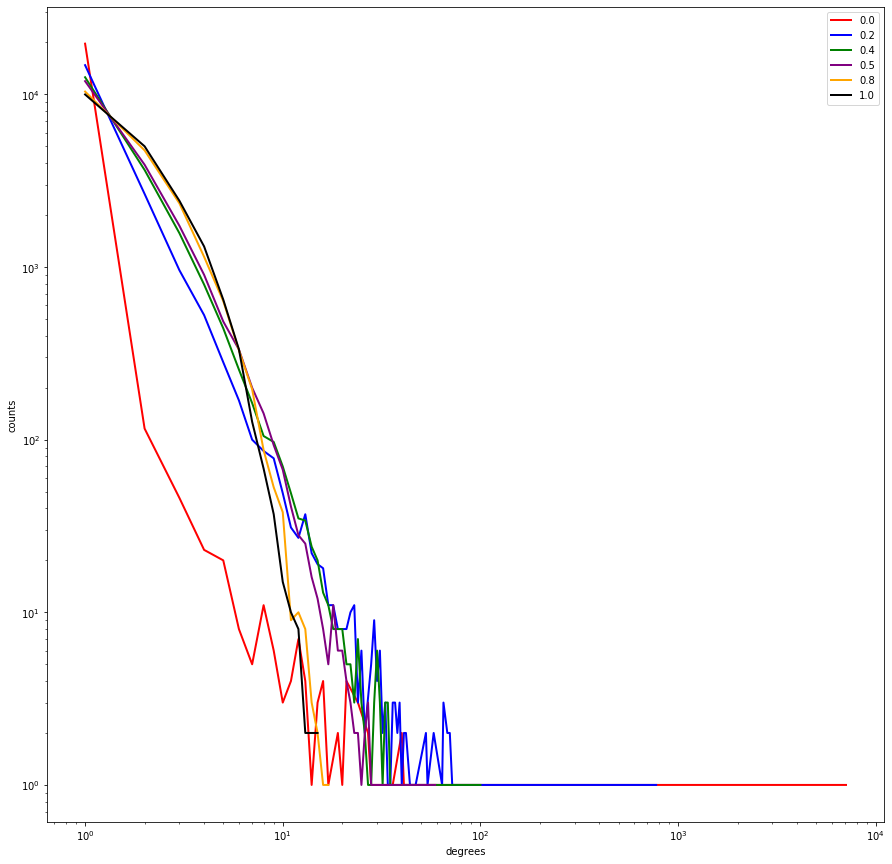

In [43]:
col = ['red','blue','green','purple','orange','black','yellow']

plt.figure(figsize=(15,15))
for i in range(len(degree_lists)):
  plt.plot(degree_lists[i], count_lists[i], color=col[i], linewidth=2)
plt.yscale('log') 
plt.xscale('log') 
legend_list = [str(x) for x in probs]
plt.legend(legend_list)
plt.xlabel('degrees')#('Normalized degrees')
plt.ylabel('counts')
plt.show()

In [0]:
degree_lists_norm = []
count_lists_norm = []

for i in range(len(degree_lists)):
  #raw_degree = degree_lists[i]
  #raw_count = count_lists[i]
  #norm_degree = [float(i)/max(raw_degree) for i in raw_degree]
  #norm_count = [float(i)/max(raw_count) for i in raw_count]
  #degree_lists_norm.append(norm_degree)
  #count_lists_norm.append(norm_count)
  degree_lists_norm.append(preprocessing.normalize([degree_lists[i]])[0])
  #count_lists_norm.append(preprocessing.normalize([count_lists[i]])[0])

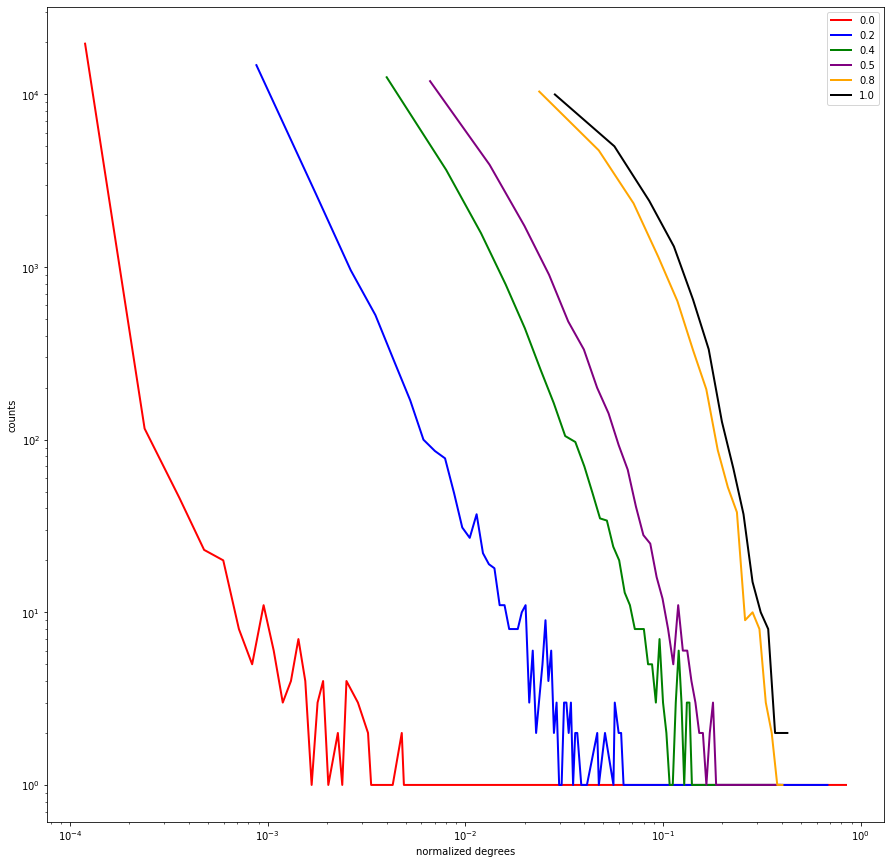

In [45]:
col = ['red','blue','green','purple','orange','black','yellow']

plt.figure(figsize=(15,15))
for i in range(len(degree_lists)):
  plt.plot(degree_lists_norm[i], count_lists[i], color=col[i], linewidth=2)
plt.yscale('log') 
plt.xscale('log') 
legend_list = [str(x) for x in probs]
plt.legend(legend_list)
plt.xlabel('normalized degrees')#('Normalized degrees')
plt.ylabel('counts')
plt.show()

In [0]:
# col = ['red','blue','green','purple','orange','black','yellow']
# legend_list = [str(x) for x in probs]

# for i in range(len(degree_lists)):
#   plt.plot(degree_lists[i], count_lists[i], color=col[i], linewidth=2)
#   plt.yscale('log') 
#   plt.xscale('log') 
#   plt.legend(legend_list[i])
#   plt.xlabel('degrees')
#   plt.ylabel('counts')
#   plt.show()

## Power Law Fitting

In [47]:
!pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24786 sha256=c0ac8907004864d662c277cf37ad1cb91de1bd2da4d1dab1b4332abbc1b2e8ce
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [48]:
import powerlaw
data = count_lists[1] # data can be list or numpy array
results = powerlaw.Fit(data)
print('alpha =',results.power_law.alpha)
print('xmin =',results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'exponential')
print('R =', R)
print('p =', p)

alpha = 1.6157736250716939
xmin = 1.0
R = 250.52011587087094
p = 1.444826490459803e-08


Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


## Scale-free graph

In [0]:
G_sf = nx.scale_free_graph(2000)

In [0]:
degree_sequence = sorted([d for n, d in G_sf.degree()])
degreeCount = collections.Counter(degree_sequence)
deg_sf, cnt_sf = zip(*degreeCount.items())

In [51]:
data = cnt_sf # data can be list or numpy array
results = powerlaw.Fit(data)
print('alpha =',results.power_law.alpha)
print('xmin =',results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'exponential')
print('R =', R)
print('p =', p)

alpha = 1.7846532525343752
xmin = 1.0
R = 105.04546394696328
p = 9.821403230660425e-07


Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


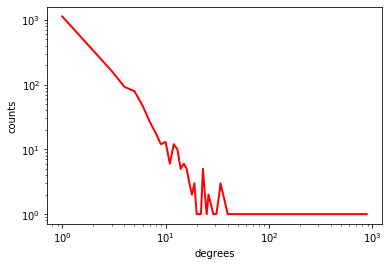

In [52]:
plt.plot(deg_sf, cnt_sf, color='red', linewidth=2)
plt.yscale('log') 
plt.xscale('log') 
plt.xlabel('degrees')#('Normalized degrees')
plt.ylabel('counts')
plt.show()

No handles with labels found to put in legend.


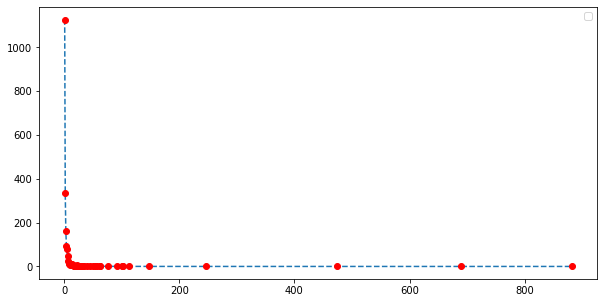

In [55]:
#code originated from https://stackoverflow.com/questions/41109122/fitting-a-curve-to-a-power-law-distribution-with-curve-fit-does-not-work
import numpy as np
from scipy.optimize import curve_fit

def func_powerlaw(x, a, b) :
    return a * np.power(x, b)
  
target_func = func_powerlaw
popt, pcov = curve_fit(target_func, deg_sf, cnt_sf, maxfev=2000)

plt.figure(figsize=(10, 5))
plt.plot(deg_sf, target_func(deg_sf, *popt), '--')
plt.plot(deg_sf, cnt_sf, 'ro')
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.show()


In [0]:
#code originated from https://stackoverflow.com/questions/41109122/fitting-a-curve-to-a-power-law-distribution-with-curve-fit-does-not-work

import numpy as np
from scipy.optimize import curve_fit

def func_powlaw(x, a, b) :
    return a * np.power(x, b)
  
target_func = func_powerlaw

def curve_fit_log(xdata, ydata) :
    """Fit data to a power law with weights according to a log scale"""
    # Weights according to a log scale
    # Apply fscalex
    xdata_log = np.log10(xdata)
    # Apply fscaley
    ydata_log = np.log10(ydata)
    # Fit linear
    popt_log, pcov_log = curve_fit(target_func, xdata_log, ydata_log, maxfev=2000)
    # #print(popt_log, pcov_log)
    # # Apply fscaley^-1 to fitted data
    # ydatafit_log = np.power(10, linlaw(xdata_log, *popt_log))
    # # There is no need to apply fscalex^-1 as original data is already available
    return (popt_log, pcov_log)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


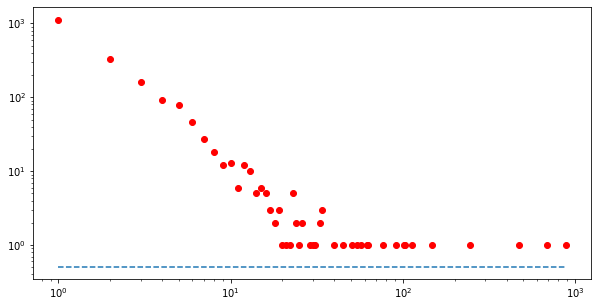

In [57]:
popt_log, pcov_log = curve_fit_log(deg_sf, cnt_sf)

plt.figure(figsize=(10, 5))
plt.plot(deg_sf, target_func(deg_sf, *popt_log), '--')
plt.plot(deg_sf, cnt_sf, 'ro')
plt.xscale('log')
plt.yscale('log')
plt.show()

##  Erdos-Renyi random graph

In [0]:
#given
n = 2000
p = 0.1

#create graph
G = nx.Graph()
G.add_nodes_from([i for i in range(n)])
for i in G.nodes():
  for j in G.nodes():
    if i != j:
      r = random.random()
      if r<= p:
        G.add_edge(i,j)

In [0]:
# calculate degree distribution
degree_sequence = sorted([d for n, d in G.degree()])
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
deg_norm = preprocessing.normalize([deg])[0]

In [60]:
print('p =', p)
print(deg)
print(cnt)
print('\n')

p = 0.1
(312, 321, 322, 323, 326, 328, 329, 330, 332, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 427, 429, 430, 435, 437)
(1, 1, 1, 1, 3, 2, 2, 1, 2, 3, 1, 2, 5, 1, 6, 1, 2, 4, 1, 9, 8, 9, 11, 9, 8, 13, 10, 18, 15, 14, 14, 25, 23, 17, 31, 25, 24, 35, 30, 23, 19, 42, 41, 29, 43, 39, 37, 46, 50, 44, 38, 33, 52, 44, 44, 49, 39, 46, 55, 56, 59, 41, 46, 46, 29, 29, 35, 34, 29, 20, 29, 26, 29, 33, 21, 23, 16, 18, 18, 20, 16, 10, 16, 8, 8, 9, 10, 5, 10, 6, 6, 9, 3, 5, 2, 4, 1, 2, 2, 2, 1, 3, 2, 1, 1)




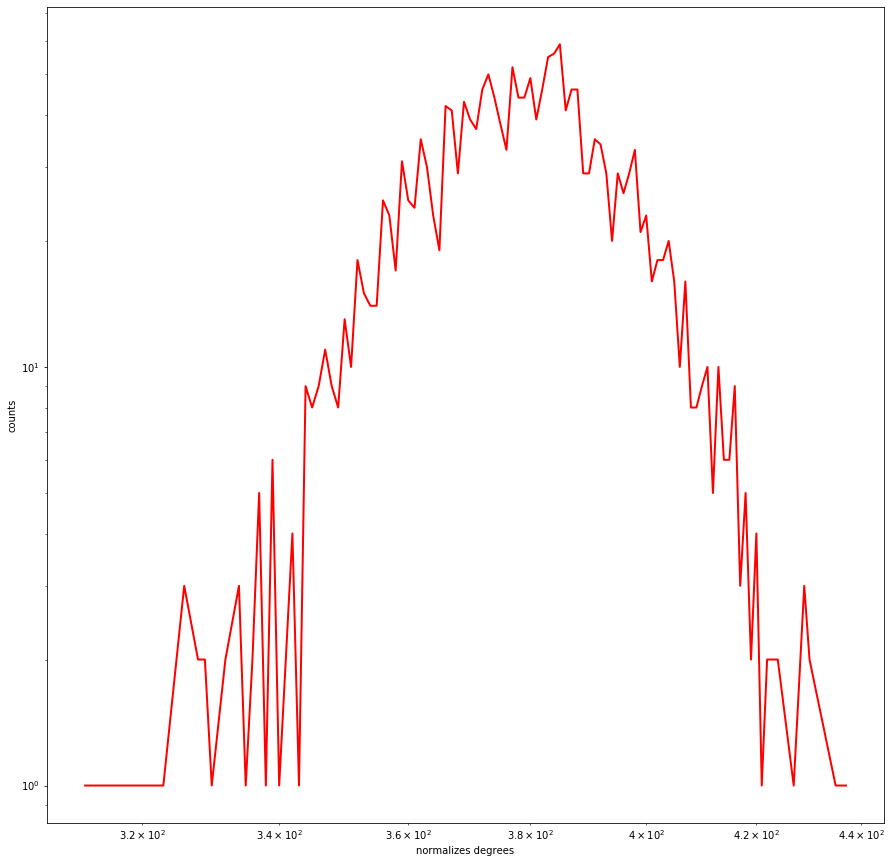

In [61]:
plt.figure(figsize=(15,15))
plt.plot(deg, cnt, color='red', linewidth=2)
plt.yscale('log') 
plt.xscale('log') 
plt.xlabel('normalizes degrees')#('Normalized degrees')
plt.ylabel('counts')
plt.show()

# 11.3 Central Actors

## Degree Centrality

In [0]:
#edges = pd.read_csv("/content/drive/My Drive/DataScience/ML_11/week11_imdb_actor_edges.tsv", delimiter='\t', skiprows=[0], header=None)
edges = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/week11_imdb_actor_edges.tsv", delimiter='\t', skiprows=[0], header=None)

edges.columns = ["actor_A", "actor_B", "Weight"]

In [0]:
edges.head()

actor_A  actor_B  Weight
0     5578     9770       3
1     5578      929       2
2     5578     9982       2
3     1835     6278       2
4     1835     1664       7

In [0]:
edges.describe()

actor_A        actor_B         Weight
count  287073.000000  287073.000000  287073.000000
mean     6271.695715    6333.090663       3.281197
std      4762.206388    4764.689852       2.991389
min         0.000000       0.000000       2.000000
25%      1975.000000    2239.000000       2.000000
50%      5391.000000    5405.000000       2.000000
75%      9847.000000    9859.000000       3.000000
max     17915.000000   17911.000000     118.000000

In [0]:

#keys = pd.read_csv("/content/drive/My Drive/DataScience/ML_11/week11_imdb_actors_key.tsv", delimiter='\t', skiprows=[0], encoding = 'unicode_escape', header=None)
keys = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/week11_imdb_actors_key.tsv", delimiter='\t', skiprows=[0], encoding = 'unicode_escape', header=None)

In [0]:
keys.columns = ["ID", "name", "movies_95_04", "main_genre", "genres"]
keys.head()

ID  ...                                             genres
0  15629  ...  Action:1,Comedy:1,Drama:1,Fantasy:1,Horror:1,N...
1   5026  ...  Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3...
2  11252  ...  Comedy:6,Documentary:1,Drama:7,Family:1,Fantas...
3   5150  ...  Comedy:6,Crime:1,Documentary:1,Drama:4,NULL:5,...
4   4057  ...  Comedy:2,Crime:1,Drama:7,Horror:1,Music:1,Musi...

[5 rows x 5 columns]

In [0]:
print("The Graph Consist of " + str(len(edges))+ " edges!")

The Graph Consist of 287073 edges!


In [0]:
print("The Graph Consist of " + str(len(keys))+ " nodes!")

The Graph Consist of 17577 nodes!


In [0]:
G = nx.from_pandas_edgelist(edges, "actor_A" , 'actor_B', ['Weight'], create_using=nx.DiGraph())

In [0]:
mapping = dict(zip(keys["ID"].tolist(), keys["name"].tolist()))

In [0]:
G = nx.relabel_nodes(G, mapping)

In [0]:
LWCC = max(nx.weakly_connected_components(G), key=len)

In [0]:
len(LWCC)


17455

In [0]:
H = G.subgraph(LWCC)

In [0]:
len(H.edges())

286911

In [0]:
len(H .nodes())

17455

In [0]:
len(G.edges())

287073

In [0]:
LWCC = list(LWCC)

In [0]:
for node in list(G.nodes()):
  if node not in LWCC:
    G.remove_node(node)

In [0]:
print(len(G.nodes()))


17455


In [0]:
len(G.edges())

286911

In [0]:
degree_centrality = nx.degree_centrality(G)

In [0]:
degree_centrality_sorted = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

In [0]:
top_20_actors_degree = []
for i in range(0,20,1):
  top_20_actors_degree.append(degree_centrality_sorted[i])

In [0]:
for i in top_20_actors_degree:
  print(i)

('Davis, Mark (V)', 0.0449180703563653)
('Sanders, Alex (I)', 0.03494900882319239)
('North, Peter (I)', 0.034318780795233185)
('Marcus, Mr.', 0.03345937893892518)
('Tedeschi, Tony', 0.03214162942591956)
('Dough, Jon', 0.03179786868339636)
('Stone, Lee (II)', 0.03122493411252435)
('Voyeur, Vince', 0.030537412627477944)
('Lawrence, Joel (II)', 0.02864672854360032)
('Steele, Lexington', 0.02824567434398992)
('Ashley, Jay', 0.028073793972728314)
('Boy, T.T.', 0.027214392116420308)
('Cannon, Chris (III)', 0.026985218288071502)
('Jeremy, Ron', 0.026985218288071502)
('Bune, Tyce', 0.0265268706313739)
('Hanks, Tom', 0.026183109888850694)
('Michaels, Sean', 0.02583934914632749)
('Stone, Kyle', 0.02578205568924029)
('Hardman, Dave', 0.025094534204193882)
('Surewood, Brian', 0.024521599633321876)


In [0]:
dic_top = dict(top_20_actors_degree)
l = list(dic_top.keys())

In [0]:
pd.set_option('max_colwidth', 800)

In [0]:
df = keys[keys['name'].isin(l)]
df.sort_values(by="movies_95_04", ascending=False)

ID  ...                                                                                                                                        genres
12147   162  ...                                                  Action:1,Adult:429,Comedy:3,Crime:1,Documentary:5,Drama:6,Fantasy:1,NULL:92,Sci-Fi:1,Short:1
1761   1743  ...                                             Action:1,Adult:380,Adventure:1,Comedy:2,Documentary:7,Drama:3,NULL:65,Sci-Fi:3,Short:2,Thriller:3
13442  1754  ...                                                                  Action:1,Adult:389,Documentary:5,Drama:5,NULL:55,Sci-Fi:3,Short:1,Thriller:1
11272  1802  ...                                                                                    Adult:343,Crime:1,Documentary:2,NULL:86,Short:1,Thriller:2
15511   160  ...                                                                Adult:340,Comedy:1,Documentary:4,Drama:1,Fantasy:1,Horror:1,NULL:80,Thriller:1
5968    179  ...                                                                       Adult:310,Comedy:1,Documentary:1,Fantasy:2,NULL:87,Romance:1,Thriller:1
2236    176  ...                                                 Action:1,Adult:303,Comedy:3,Crime:1,Documentary:3,Drama:1,NULL:50,Sci-Fi:3,Short:3,Thriller:2
4092    407  ...                                  Adult:286,Adventure:1,Comedy:1,Documentary:2,Drama:5,Fantasy:1,NULL:63,Romance:2,Sci-Fi:1,Short:1,Thriller:1
17062  1626  ...                                                                  Action:1,Adult:271,Documentary:5,Drama:4,NULL:48,Sci-Fi:4,Short:1,Thriller:2
537    1688  ...                                                                               Adult:240,Adventure:1,Comedy:2,Drama:3,NULL:67,Sci-Fi:3,Short:3
5752    175  ...                                                                           Adult:257,Comedy:1,Documentary:1,Musical:1,NULL:53,Sci-Fi:1,Short:1
16429   127  ...                                                                Adult:247,Adventure:1,Comedy:1,Documentary:2,Drama:1,NULL:53,Romance:1,Short:3
8354    164  ...                                                                 Adult:248,Adventure:1,Comedy:1,Documentary:1,Drama:5,NULL:34,Sci-Fi:8,Short:2
8843    131  ...                                                        Action:1,Adult:226,Comedy:2,Documentary:4,Drama:1,Fantasy:2,NULL:49,Romance:1,Sci-Fi:1
10548  2108  ...  Adult:149,Adventure:1,Animation:1,Comedy:15,Documentary:26,Drama:15,Horror:9,Music:2,Musical:1,NULL:43,Romance:3,Sci-Fi:8,Short:4,Thriller:3
1124    177  ...                                                                 Adult:212,Comedy:3,Documentary:2,Fantasy:4,NULL:50,Romance:1,Sci-Fi:4,Short:2
6840    163  ...                                                                                                  Adult:213,Comedy:3,Fantasy:2,NULL:48,Short:1
6587   1778  ...                                                                                       Adult:203,Documentary:4,Drama:1,Fantasy:1,NULL:42,War:1
11387  1804  ...                                                                                         Adult:190,Comedy:2,Fantasy:1,Horror:1,NULL:49,Short:1
4524    701  ...                    Animation:3,Comedy:5,Documentary:32,Drama:6,Family:6,Fantasy:1,Music:5,Mystery:1,NULL:2,Romance:2,Short:9,Thriller:2,War:1

[20 rows x 5 columns]

In [0]:
keys_max_movies = keys.sort_values(by="movies_95_04", ascending=False)
keys_max_movies.head(20)

ID  ...                                             genres
12147   162  ...  Action:1,Adult:429,Comedy:3,Crime:1,Documentar...
1761   1743  ...  Action:1,Adult:380,Adventure:1,Comedy:2,Docume...
13442  1754  ...  Action:1,Adult:389,Documentary:5,Drama:5,NULL:...
11272  1802  ...  Adult:343,Crime:1,Documentary:2,NULL:86,Short:...
15511   160  ...  Adult:340,Comedy:1,Documentary:4,Drama:1,Fanta...
5968    179  ...  Adult:310,Comedy:1,Documentary:1,Fantasy:2,NUL...
2236    176  ...  Action:1,Adult:303,Comedy:3,Crime:1,Documentar...
4092    407  ...  Adult:286,Adventure:1,Comedy:1,Documentary:2,D...
17062  1626  ...  Action:1,Adult:271,Documentary:5,Drama:4,NULL:...
537    1688  ...  Adult:240,Adventure:1,Comedy:2,Drama:3,NULL:67...
5752    175  ...  Adult:257,Comedy:1,Documentary:1,Musical:1,NUL...
16429   127  ...  Adult:247,Adventure:1,Comedy:1,Documentary:2,D...
8354    164  ...  Adult:248,Adventure:1,Comedy:1,Documentary:1,D...
6845   2333  ...  Adult:245,Adventure:1,Comedy:3,Documentary:5,D...
9416   1664  ...   Adult:238,Documentary:1,Drama:1,NULL:46,Sci-Fi:2
8843    131  ...  Action:1,Adult:226,Comedy:2,Documentary:4,Dram...
10548  2108  ...  Adult:149,Adventure:1,Animation:1,Comedy:15,Do...
9657   1690  ...             Adult:210,Adventure:1,Horror:1,NULL:67
1124    177  ...  Adult:212,Comedy:3,Documentary:2,Fantasy:4,NUL...
2985    106  ...  Adult:222,Crime:2,Documentary:1,Drama:1,NULL:4...

[20 rows x 5 columns]

## Betweenness Centrality


In [0]:
betweenness_centrality = nx.betweenness_centrality(G, normalized = True, endpoints = False)


In [0]:
betweenness_centrality_sorted = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

In [0]:
top_20_actors_betweenness = []
for i in range(0,20,1):
  top_20_actors_betweenness.append(betweenness_centrality_sorted[i])

In [0]:
for i in top_20_actors_betweenness:
  print(i)

('Cruz, Penélope', 0.005094490628465504)
('Goldberg, Whoopi', 0.004810376861791525)
('Arquette, David', 0.003594527641278501)
('Deneuve, Catherine', 0.003460230978618826)
('Travolta, John', 0.0034351035586759216)
('Berry, Halle', 0.0032697484154360907)
('Diaz, Cameron', 0.003066397322686857)
('Chloe (I)', 0.002930751385426036)
('Hjejle, Iben', 0.002587992690998613)
('Waters, John (I)', 0.002572643859774737)
('Vrana, Vlasta', 0.002494134726558358)
('Kidman, Nicole', 0.002324545282871832)
('Hayek, Salma', 0.002288741909238022)
('Depardieu, Gérard', 0.002247044866986259)
('Potente, Franka', 0.002237263790297669)
('Kean, Katja', 0.002231251561833023)
('St. Clair, Taylor (I)', 0.002211280828602663)
('Woods, James (I)', 0.0022104016412191865)
('Lovell, Jacqueline', 0.0021907734643665184)
('Moore, Julianne (I)', 0.002132481876190697)


In [0]:
dic_top_1 = dict(top_20_actors_betweenness)
l_1 = list(dic_top_1.keys())
df_1 = keys[keys['name'].isin(l_1)]
df_1

ID  ...                                                                                                                                                      genres
2069   4627  ...                                                                                               Comedy:3,Crime:1,Drama:10,NULL:3,Romance:3,Short:2,Thriller:4
2563    564  ...                                   Adventure:1,Comedy:2,Documentary:5,Drama:6,Family:5,Music:3,Mystery:2,NULL:3,Romance:6,Short:5,Thriller:2,War:3,Western:3
3588    503  ...                                  Adult:1,Animation:1,Comedy:4,Crime:1,Documentary:14,Drama:7,Family:3,Music:4,Mystery:2,NULL:5,Romance:5,Short:9,Thriller:3
4347   2290  ...                                                                                           Adult:20,Comedy:1,Documentary:6,Music:2,NULL:3,Short:6,Thriller:1
6216   7253  ...                                  Action:2,Adult:8,Comedy:5,Documentary:3,Drama:3,Fantasy:1,Horror:2,Mystery:1,NULL:11,Romance:2,Sci-Fi:2,Short:2,Thriller:4
7694   3476  ...      Action:4,Adult:2,Adventure:2,Comedy:1,Crime:1,Documentary:1,Drama:18,Family:1,Horror:3,Mystery:1,NULL:4,Romance:1,Sci-Fi:2,Thriller:15,War:3,Western:1
8091   8447  ...                                                                                             Comedy:4,Crime:1,Documentary:18,Horror:1,Music:2,NULL:5,Short:3
8119   3268  ...                       Adventure:1,Comedy:2,Crime:1,Documentary:23,Drama:5,Family:8,Fantasy:3,Music:5,Mystery:1,NULL:6,Romance:2,Sci-Fi:1,Short:3,Thriller:2
8512   5256  ...                                                                Action:1,Comedy:9,Documentary:4,Drama:3,Family:1,Music:3,NULL:5,Romance:2,Short:7,Thriller:1
8534    574  ...                                            Comedy:2,Crime:1,Documentary:16,Drama:5,Family:7,Music:4,Musical:1,Mystery:1,NULL:6,Romance:4,Short:3,Thriller:4
9655   3213  ...                Adventure:3,Animation:1,Comedy:16,Documentary:35,Drama:11,Family:12,Fantasy:2,Music:9,Musical:1,Mystery:1,NULL:11,Romance:1,Sci-Fi:2,Short:4
9851    551  ...     Action:3,Adult:1,Adventure:2,Animation:1,Comedy:8,Crime:2,Documentary:6,Drama:5,Family:2,Music:1,NULL:3,Romance:3,Sci-Fi:1,Short:2,Thriller:4,Western:1
10169  3235  ...                                Adventure:1,Crime:4,Documentary:27,Drama:5,Family:4,Fantasy:1,Music:5,Mystery:1,NULL:6,Romance:1,Sci-Fi:2,Short:4,Thriller:2
11303   168  ...                                                              Adult:116,Comedy:3,Crime:1,Documentary:7,Drama:2,Music:1,NULL:22,Romance:2,Sci-Fi:1,Thriller:1
11645  4030  ...  Action:2,Adventure:1,Animation:1,Comedy:3,Crime:2,Documentary:12,Drama:13,Family:4,Fantasy:1,Horror:1,Music:1,Mystery:1,NULL:5,Sci-Fi:2,Short:6,Thriller:3
12106  6233  ...                                                             Action:1,Adult:88,Comedy:3,Documentary:4,Fantasy:1,Horror:1,NULL:45,Sci-Fi:3,Short:1,Thriller:4
15834  2623  ...                      Adventure:1,Animation:1,Comedy:3,Crime:2,Documentary:9,Drama:7,Family:1,Music:4,NULL:2,Romance:2,Sci-Fi:3,Short:4,Thriller:4,Western:1
16453   235  ...                                                                                Comedy:7,Documentary:14,Drama:9,Family:1,Music:1,Mystery:1,Romance:7,Short:3
16742   659  ...                                                              Comedy:2,Crime:1,Documentary:10,Drama:13,Family:1,NULL:3,Romance:4,Sci-Fi:1,Short:3,Thriller:2
17458   285  ...                                                  Adventure:1,Comedy:15,Crime:2,Documentary:11,Drama:12,Family:2,Fantasy:1,NULL:2,Romance:7,Thriller:1,War:2

[20 rows x 5 columns]

In [0]:
remain = [(x,u) for (x,u) in top_20_actors_betweenness for (y,v) in top_20_actors_degree if x == y]

In [0]:
for (x,u) in top_20_actors_betweenness:
  for (y,v) in top_20_actors_degree:
    if (x == y):
      print("Hello")


## Closeness Centrality

In [0]:
closeness_centrality = nx.closeness_centrality(G)

In [0]:
closeness_centrality_sorted = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

In [0]:
top_20_actors_closeness = []
for i in range(0,20,1):
  top_20_actors_closeness.append(closeness_centrality_sorted[i])

In [0]:
for i in top_20_actors_closeness:
  print(i)

('Hopper, Dennis', 0.19295595135896443)
('Hanks, Tom', 0.18891513797280368)
('Hoffman, Dustin', 0.18611740269000351)
('Ice-T', 0.1801411430266888)
('Howard, Ron', 0.1780302823015266)
('Hawn, Phil', 0.17739178709597664)
('Howard, Clint', 0.17645001767095025)
('Hopkins, Anthony', 0.17513158698388423)
('Heston, Charlton', 0.17228025865581995)
('Harrelson, Woody', 0.17072594188875706)
('Harris, Ed (I)', 0.1694850462391888)
('Grant, Hugh (I)', 0.16713813474989697)
('Ford, Harrison (I)', 0.16462395484761191)
('Hounsou, Djimon', 0.1634521689915626)
('Gibson, Mel (I)', 0.16263903325014653)
('Hyde Pierce, David', 0.16263807221980509)
('Hartman, Phil', 0.1620587000296622)
('Hutton, Timothy', 0.1619897419272596)
('Hudson, Rock', 0.1614958144929556)
('Eastwood, Clint', 0.16140367733371108)


In [0]:
dic_top_2 = dict(top_20_actors_closeness)
l_2 = list(dic_top_2.keys())
df_2 = keys[keys['name'].isin(l_2)]


In [0]:
df_2

ID  ...                                                                                                                                                    genres
757     7277  ...                                                                                         Comedy:4,Documentary:24,Drama:1,Family:2,Mystery:1,NULL:2,Short:2
1590    3317  ...                                          Action:1,Adventure:1,Comedy:2,Crime:1,Documentary:2,Drama:3,Family:1,Fantasy:1,NULL:1,Romance:1,Sci-Fi:1,Short:2
1835    3884  ...  Action:2,Adventure:4,Comedy:8,Documentary:3,Drama:6,Family:3,Fantasy:2,Horror:7,Music:2,Mystery:1,NULL:5,Romance:3,Sci-Fi:3,Short:3,Thriller:5,Western:1
2377    3361  ...              Action:6,Adult:2,Adventure:2,Comedy:2,Crime:3,Documentary:16,Drama:8,Family:2,Music:4,Musical:1,Mystery:1,NULL:9,Sci-Fi:1,Short:1,Thriller:5
2452    6131  ...                                                             Comedy:4,Crime:1,Documentary:8,Drama:4,Family:4,Music:1,Romance:6,Sci-Fi:1,Short:2,Thriller:1
3216    3186  ...                                                      Documentary:14,Drama:5,Family:3,Horror:1,Music:1,Mystery:1,NULL:2,Romance:2,Short:3,Thriller:3,War:1
4524     701  ...                                Animation:3,Comedy:5,Documentary:32,Drama:6,Family:6,Fantasy:1,Music:5,Mystery:1,NULL:2,Romance:2,Short:9,Thriller:2,War:1
5832    3142  ...                                           Action:2,Adventure:1,Comedy:2,Crime:1,Documentary:29,Family:1,Music:2,NULL:1,Romance:2,Short:5,Thriller:4,War:1
6322    3930  ...                                          Animation:1,Comedy:6,Documentary:23,Drama:5,Family:4,Music:2,Mystery:1,NULL:2,Romance:1,Short:3,Thriller:6,War:2
9191     644  ...                                                                              Animation:1,Comedy:15,Documentary:3,Drama:2,Family:1,Music:1,NULL:2,Sci-Fi:1
9701     692  ...                             Adventure:1,Animation:1,Comedy:8,Documentary:10,Drama:5,Family:2,NULL:4,Romance:1,Sci-Fi:1,Short:1,Thriller:1,War:1,Western:1
11556   6900  ...                                                    Comedy:1,Crime:1,Documentary:13,Drama:11,Family:2,Music:1,Mystery:1,NULL:1,Sci-Fi:1,Short:6,Thriller:4
12220   3295  ...                                                        Comedy:2,Crime:1,Documentary:15,Drama:2,Family:3,Fantasy:2,Mystery:2,NULL:1,Sci-Fi:1,Short:6,War:1
12510   1448  ...                                            Action:1,Adventure:2,Comedy:6,Crime:2,Documentary:1,Drama:1,Family:2,Music:2,NULL:6,Romance:3,Sci-Fi:2,Short:3
13169  10398  ...                                                                                                                            Documentary:12,Music:1,Short:1
16754   2896  ...  Action:3,Adult:1,Adventure:1,Comedy:3,Crime:1,Documentary:38,Drama:11,Family:3,Horror:1,Music:12,Mystery:1,NULL:7,Romance:1,Sci-Fi:3,Short:9,Thriller:11
16948   3294  ...                                                    Action:9,Adult:1,Comedy:2,Documentary:3,Drama:8,Family:1,Horror:1,NULL:2,Romance:1,Sci-Fi:1,Thriller:4
17016    728  ...                                                        Adventure:1,Comedy:3,Documentary:26,Drama:3,Family:2,Mystery:1,NULL:5,Short:4,Thriller:1,Western:4
17269   3306  ...                                                     Comedy:2,Crime:1,Documentary:28,Drama:1,Family:1,Fantasy:1,Music:3,Mystery:1,NULL:2,Romance:1,Short:7
17528    441  ...                           Adult:2,Adventure:4,Comedy:12,Crime:2,Drama:14,Family:1,Fantasy:1,Mystery:1,NULL:1,Romance:6,Sci-Fi:3,Short:11,Thriller:7,War:2

[20 rows x 5 columns]

#11.4 Machine Learning

## Time Dependent Labeling

In [0]:
 edge_temporal = pd.read_csv("/content/drive/My Drive/DataScience/ML_11/ht09_contact_list.tsv",sep='\t', header=None)

In [63]:
edge_temporal.head()

0     1     2
0   20  1336  1337
1   40  1336  1337
2   60  1336  1337
3   80  1336  1337
4  100  1336  1337

In [0]:
edge_temporal.columns = ["TimeInterval","IndividualA","IndividualB"]

In [65]:
max(edge_temporal["TimeInterval"])

212360

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [0]:
#Seconds in a Day -> 86400
seconds_day = 86400

In [0]:
time_intervals = edge_temporal["TimeInterval"]

In [0]:
time_intervals = np.ceil(time_intervals/seconds_day)

In [70]:
print(time_intervals)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
20813    3.0
20814    3.0
20815    3.0
20816    3.0
20817    3.0
Name: TimeInterval, Length: 20818, dtype: float64


In [0]:
new_data = {"Individual_A":edge_temporal["IndividualA"],"Individual_B":edge_temporal["IndividualB"],"Time_Interval_Day":time_intervals}
edges_temporal_day = pd.DataFrame(data=new_data)

In [72]:
edges_temporal_day.head()

Individual_A  Individual_B  Time_Interval_Day
0          1336          1337                1.0
1          1336          1337                1.0
2          1336          1337                1.0
3          1336          1337                1.0
4          1336          1337                1.0

In [0]:
edges_day_one = edges_temporal_day.loc[edges_temporal_day['Time_Interval_Day'] ==1]

In [74]:
edges_day_one.tail()

Individual_A  Individual_B  Time_Interval_Day
6920          1144          1149                1.0
6921          1033          1201                1.0
6922          1075          1142                1.0
6923          1075          1142                1.0
6924          1075          1206                1.0

In [0]:
G_dayOne = nx.from_pandas_edgelist(edges_day_one, "Individual_A" , 'Individual_B',create_using=nx.Graph())

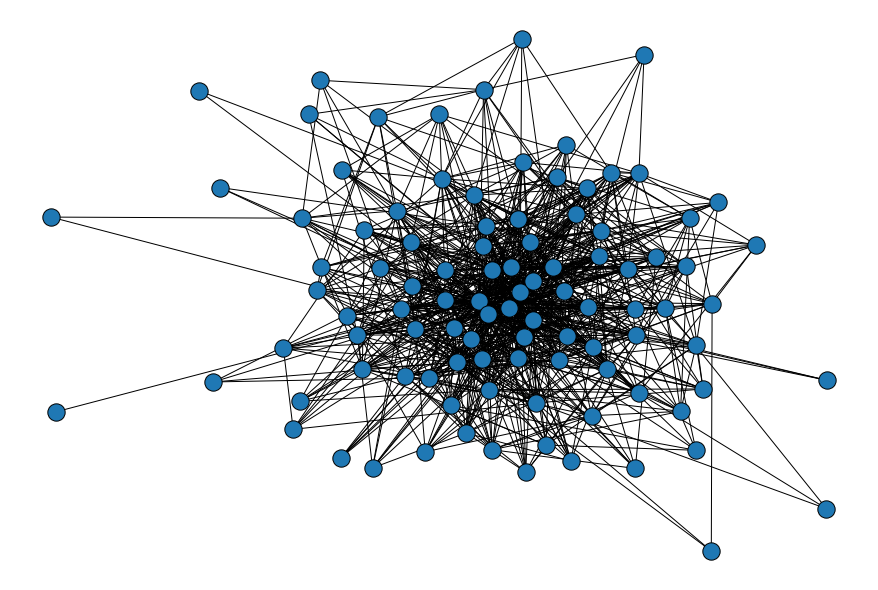

In [76]:
plt.figure(figsize=(12,8))
nx.draw(G_dayOne)
plt.gca().collections[0].set_edgecolor("#000000")

In [0]:
pred_jaccard = list(nx.jaccard_coefficient(G_dayOne))

In [0]:
edges_day_two = edges_temporal_day.loc[edges_temporal_day['Time_Interval_Day'] ==2]

In [79]:
edges_day_two.tail()

Individual_A  Individual_B  Time_Interval_Day
14051          1162          1133                2.0
14052          1156          1133                2.0
14053          1156          1133                2.0
14054          1360          1144                2.0
14055          1033          1341                2.0

In [80]:
G_dayTwo = nx.from_pandas_edgelist(edges_day_two, "Individual_A" , 'Individual_B',create_using=nx.Graph())

edges_subset = G_dayTwo.edges()
print(edges_subset)

[(1188, 1075), (1188, 1125), (1188, 1104), (1188, 1090), (1188, 1142), (1188, 1201), (1188, 1358), (1188, 1175), (1188, 1039), (1188, 1133), (1188, 1334), (1188, 1067), (1188, 1146), (1188, 1026), (1188, 1033), (1188, 1171), (1188, 1199), (1188, 1228), (1188, 1042), (1188, 1126), (1188, 1204), (1075, 1142), (1075, 1360), (1075, 1164), (1075, 1206), (1075, 1138), (1075, 1126), (1075, 1175), (1075, 1358), (1075, 1089), (1075, 1115), (1075, 1168), (1075, 1093), (1075, 1215), (1075, 1073), (1142, 1206), (1142, 1164), (1142, 1171), (1142, 1090), (1142, 1092), (1142, 1360), (1142, 1109), (1142, 1073), (1142, 1114), (1142, 1042), (1142, 1033), (1142, 1135), (1142, 1108), (1142, 1358), (1142, 1208), (1142, 1162), (1142, 1191), (1142, 1089), (1142, 1336), (1142, 1086), (1142, 1126), (1142, 1212), (1142, 1044), (1142, 1057), (1142, 1215), (1142, 1051), (1142, 1193), (1142, 1198), (1142, 1199), (1142, 1133), (1142, 1117), (1142, 1187), (1142, 1138), (1142, 1029), (1142, 1136), (1142, 1046), (1142

In [0]:
pred_jaccard = list(nx.jaccard_coefficient(G_dayOne,G_dayOne.edges))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in G_dayTwo.edges) for (u,v,s) in pred_jaccard])

# Compute the ROC AUC Score
fpr_jaccard, tpr_jaccard, _ = metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = metrics.roc_auc_score(label_jaccard, score_jaccard)

In [0]:
# Prediction using Adamic Adar 
pred_adamic = list(nx.adamic_adar_index(G_dayOne,G_dayOne.edges))
score_adamic, label_adamic = zip(*[(s, (u,v) in G_dayTwo.edges) for (u,v,s) in pred_adamic])

# Compute the ROC AUC Score
fpr_adamic, tpr_adamic, _ = metrics.roc_curve(label_adamic, score_adamic)
auc_adamic = metrics.roc_auc_score(label_adamic, score_adamic)


In [0]:
# Compute the Preferential Attachment
pred_pref = list(nx.preferential_attachment(G_dayOne,G_dayOne.edges))
score_pref, label_pref = zip(*[(s, (u,v) in G_dayTwo.edges) for (u,v,s) in pred_pref])

fpr_pref, tpr_pref, _ = metrics.roc_curve(label_pref, score_pref)
auc_pref = metrics.roc_auc_score(label_pref, score_pref)


In [84]:
print(len(fpr_pref))

334


In [0]:
fpr_jaccard = np.asarray(fpr_jaccard,dtype=np.float32)
fpr_adamic = np.asarray(fpr_adamic,dtype=np.float32)
fpr_pref = np.asarray(fpr_pref,dtype=np.float32)


In [86]:

all_fpr = np.concatenate((fpr_jaccard,fpr_adamic,fpr_pref))
all_tpr = np.concatenate((tpr_jaccard,tpr_adamic,tpr_pref))
label_jar = "JACCARD AUC: " + str(round(auc_jaccard,4))
label_ada =  "ADAMIC AUC: " + str(round(auc_adamic,4))
label_pref = "PREFERENTIAL AUC: " + str(round(auc_pref,4))
label = np.repeat([label_jar,label_ada,label_pref],[len(fpr_jaccard),len(fpr_adamic),len(fpr_pref)])

print(len(all_fpr))
print(len(all_tpr))
print(len(label))

1086
1086
1086


In [87]:
data_ROC = {"TruePositiveRate":all_tpr,"FalsePostiveRate":all_fpr,"Label":label}
df_ROC = pd.DataFrame(data=data_ROC)
df_ROC.head()

TruePositiveRate  FalsePostiveRate                Label
0          0.000000          0.000000  JACCARD AUC: 0.6312
1          0.003195          0.000000  JACCARD AUC: 0.6312
2          0.006390          0.000000  JACCARD AUC: 0.6312
3          0.006390          0.001577  JACCARD AUC: 0.6312
4          0.009585          0.001577  JACCARD AUC: 0.6312

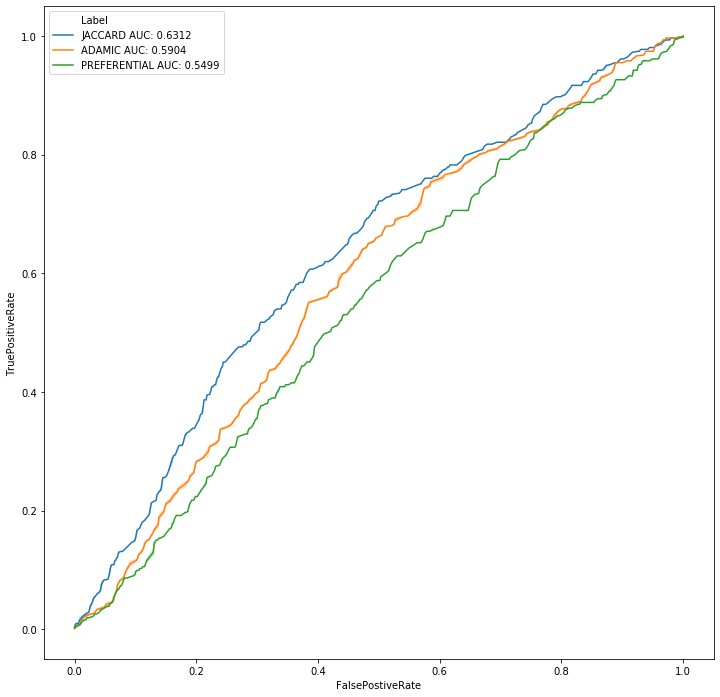

In [110]:
plt.figure(figsize=(12, 12))
sns.lineplot(x="FalsePostiveRate", y="TruePositiveRate", hue="Label", data=df_ROC)

## Label Prediction

In [0]:
 house_hold_contact = pd.read_csv("/content/drive/My Drive/DataScience/ML_11/scc2034_kilifi_all_contacts_across_households.csv",sep=',')

In [154]:
house_hold_contact.head()

h1  m1 h2  m2  age1  age2 sex1 sex2  duration  day  hour
0  E  23  F   3     3     3    F    M        40    1    14
1  E  23  F   3     3     3    F    M        40    1    14
2  E  23  F   3     3     3    F    M        20    1    14
3  E  23  F   3     3     3    F    M       200    1    15
4  E  23  F   3     3     3    F    M        20    1    15

In [0]:
house_hold_contact_m1 = house_hold_contact[["h1","m1","sex1"]]
house_hold_contact_m1 = house_hold_contact_m1.drop_duplicates()

house_hold_contact_m2 = house_hold_contact[["h2","m2","sex2"]]
house_hold_contact_m2 = house_hold_contact_m2.drop_duplicates()
house_hold_contact_m2.columns = ["h1","m1","sex1"]

In [0]:
m1_m2_df = house_hold_contact_m1.append(house_hold_contact_m2)
m1_m2_df = m1_m2_df.drop_duplicates()

In [0]:
df_nodes = m1_m2_df['h1'].map(str) + '_' + m1_m2_df['m1'].map(str)
df_nodes = pd.concat([df_nodes, m1_m2_df["sex1"]], axis=1, ignore_index=True)

In [158]:
df_nodes.head()

0  1
0   E_23  F
18   E_2  M
19   E_4  M
27   E_5  M
28   E_9  M

In [0]:
df_nodes.columns = ["node_id","sex"]

In [0]:
df1 = house_hold_contact['h1'].map(str) + '_' + house_hold_contact['m1'].map(str)
df2 = house_hold_contact['h2'].map(str) + '_' + house_hold_contact['m2'].map(str)
df_edges = pd.concat([df1, df2], axis=1, ignore_index=True)

In [0]:
df_edges = df_edges.drop_duplicates()

In [162]:
df_edges.head()

0     1
0   E_23   F_3
18   E_2   L_7
19   E_4   L_7
20   E_2  F_11
21   E_2  F_12

In [0]:
df_edges.columns = ["ID_A","ID_B"]

In [0]:
G_hc = nx.from_pandas_edgelist(df_edges, "ID_A" , 'ID_B',create_using=nx.Graph())

In [165]:
n = G_hc.number_of_nodes()
m = G_hc.number_of_edges()

print("Number of nodes: %d" % n)
print("Number of edges: %d" % m)
print("Number of connected components: %d" % nx.number_connected_components(G_hc))

Number of nodes: 28
Number of edges: 61
Number of connected components: 1


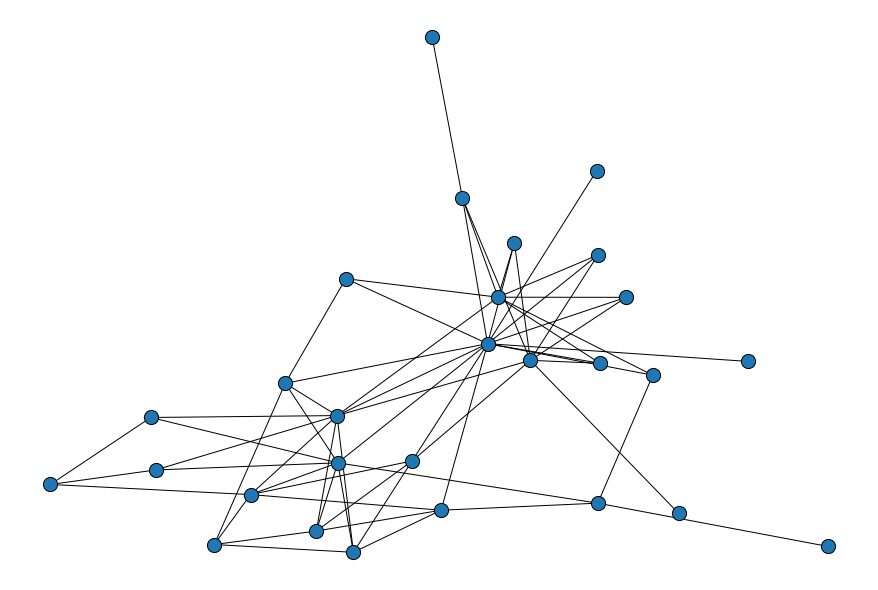

In [166]:
mapping=dict(zip(sorted(G_hc.nodes()), range(n)))
nx.relabel_nodes(G_hc, mapping, copy=False)
pos = nx.spring_layout(G_hc)

plt.figure(figsize=(12,8))
nx.draw(G_hc, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000")

In [167]:
print(mapping)

{'E_10': 0, 'E_11': 1, 'E_13': 2, 'E_15': 3, 'E_16': 4, 'E_17': 5, 'E_2': 6, 'E_20': 7, 'E_22': 8, 'E_23': 9, 'E_25': 10, 'E_27': 11, 'E_30': 12, 'E_4': 13, 'E_5': 14, 'E_6': 15, 'E_9': 16, 'F_1': 17, 'F_10': 18, 'F_11': 19, 'F_12': 20, 'F_3': 21, 'F_5': 22, 'F_7': 23, 'F_9': 24, 'L_1': 25, 'L_3': 26, 'L_7': 27}


In [0]:
labels = list(df_nodes.sort_values('node_id')["sex"])

In [169]:
print(labels)

['M', 'F', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'F']


In [0]:
labels = [1 if x == "M" else -1 for x in labels]

In [171]:
print(labels)

[1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1]


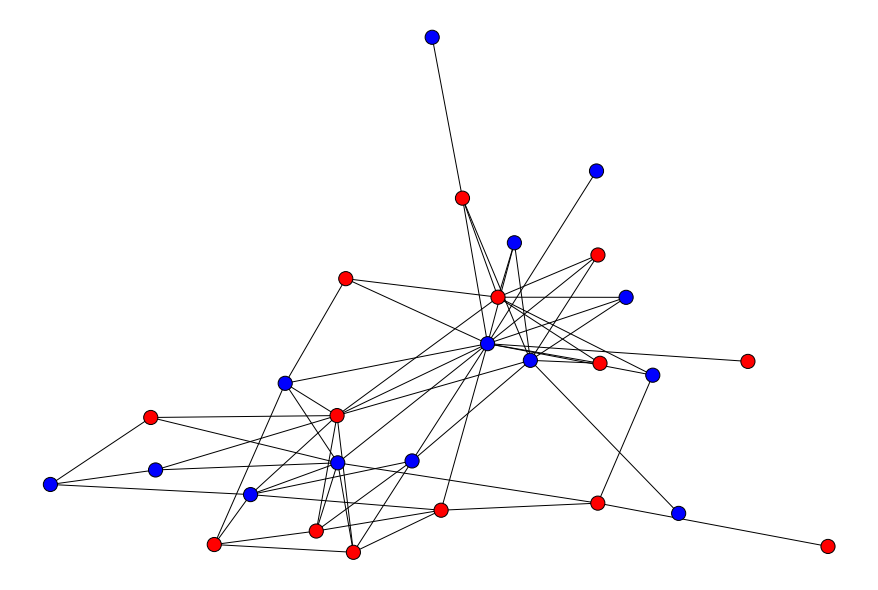

In [172]:
plt.figure(figsize=(12,8))
nx.draw(G_hc, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000")
plt.show()

In [0]:
random.seed(5)
proportion_nodes = 0.5
labeled_nodes = random.sample(G_hc.nodes(), int(proportion_nodes * G_hc.number_of_nodes()))


In [174]:
print(labeled_nodes)

[1, 2, 0, 3, 21, 22, 16, 19, 24, 9, 27, 13, 4, 15]


In [0]:
labels = np.array(labels)

In [0]:
known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

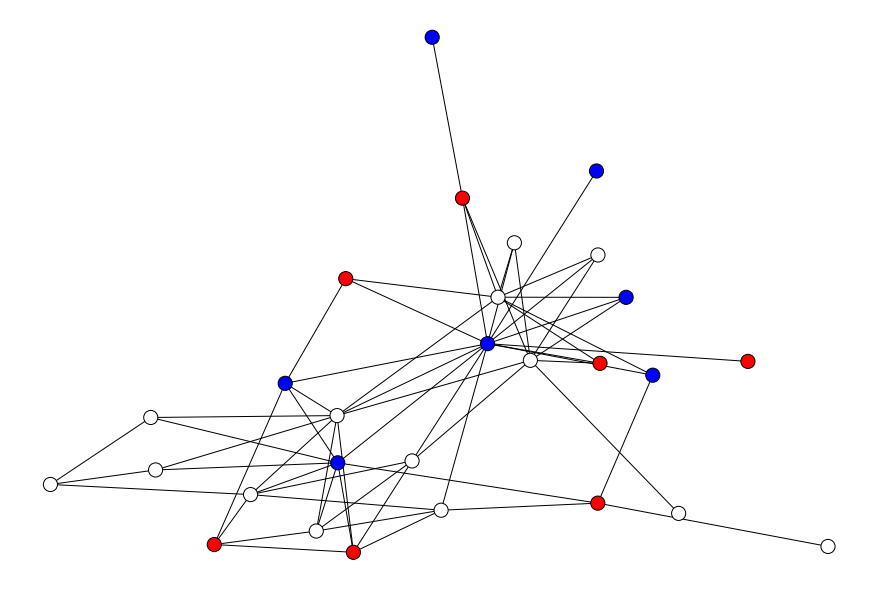

In [177]:
plt.figure(figsize=(12,8))
nx.draw(G_hc, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
plt.show()

In [0]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_hc)

Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1
I = np.identity(n)

# Create the F-pred matrix
F_pred = np.linalg.inv(I*(1-alpha) + L_sym) * Y
# Identify the prediction as the argmax
pred = np.array(np.argmax(F_pred, axis=1)*2-1).flatten()
# Compute the accuracy score
succ_rate = metrics.accuracy_score(labels, pred)

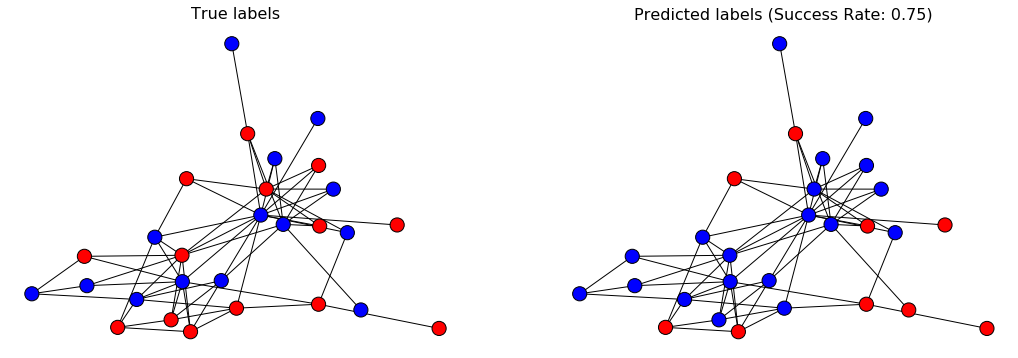

In [179]:
plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)

# Plot true values
plt.sca(axarr[0])
nx.draw(G_hc, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('True labels', size=16)
plt.gca().collections[0].set_edgecolor("#000000")

# Plot predicted values
plt.sca(axarr[1])
nx.draw(G_hc, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = pred, node_size=200, pos=pos)
axarr[1].set_title('Predicted labels (Success Rate: %.2f)' % succ_rate, size=16)
plt.gca().collections[0].set_edgecolor("#000000")